# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Dave Nathaniel Yoseph]
- **Email:** [davenathaniel123@gmail.com]
- **ID Dicoding:** [dave_ny]

## Menentukan Pertanyaan Bisnis

- Apa tingkat polutan udara paling umum?
- Bagaimana kualitas udara pada waktu tertentu?

## Import Semua Packages/Library yang Digunakan

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [18]:
# Membaca dataset
df1 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df2 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
df3 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')
df4 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
df5 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv')
df6 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv')
df7 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
df8 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df9 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
df10 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv')
df11 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv')
df12 = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

# Menyatukan dataset
new_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0, ignore_index=True)
print(new_df)

           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        

### Assessing Data

In [19]:
# Jumlah data yang memiliki null value
print(new_df.isnull().sum())

print()

# Jumlah data yang redundan atau berulang atau duplicated
print(new_df.duplicated().sum())

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

0


### Cleaning Data

In [20]:
new_df = new_df.dropna()
print(new_df)

           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
new_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
std,10001.787087,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [22]:
new_df.corr()

C:\Users\daven\AppData\Local\Temp\ipykernel_19560\4065070317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.968620,0.056211,0.016624,-0.003728,-0.026866,-0.049872,-0.227301,-0.042262,0.025281,-0.048242,-0.133544,0.193543,-0.110269,0.005496,0.056503
year,0.968620,1.000000,-0.192834,-0.008714,-0.003916,-0.029904,-0.044236,-0.168161,-0.052299,0.012698,-0.022092,-0.167188,0.194616,-0.178617,0.001162,0.091041
month,0.056211,-0.192834,1.000000,0.017476,-0.001570,0.013363,-0.021498,-0.223866,0.041530,0.049558,-0.101052,0.146401,-0.022140,0.283626,0.017509,-0.142276
day,0.016624,-0.008714,0.017476,1.000000,-0.002153,0.003457,0.024428,-0.006733,0.013503,-0.017784,-0.001101,0.012243,0.022391,0.024001,-0.002783,-0.013504
hour,-0.003728,-0.003916,-0.001570,-0.002153,1.000000,0.013275,0.051421,0.032342,-0.002536,-0.030150,0.281204,0.139155,-0.038386,-0.012506,0.012610,0.137995
PM2.5,-0.026866,-0.029904,0.013363,0.003457,0.013275,1.000000,0.884324,0.482209,0.670753,0.792041,-0.151149,-0.128907,0.013717,0.118009,-0.015268,-0.275686
PM10,-0.049872,-0.044236,-0.021498,0.024428,0.051421,0.884324,1.000000,0.466561,0.653577,0.703535,-0.114345,-0.094793,-0.021942,0.072706,-0.026885,-0.185789
SO2,-0.227301,-0.168161,-0.223866,-0.006733,0.032342,0.482209,0.466561,1.000000,0.501317,0.535289,-0.167093,-0.320991,0.218994,-0.266446,-0.040618,-0.109259
NO2,-0.042262,-0.052299,0.041530,0.013503,-0.002536,0.670753,0.653577,0.501317,1.000000,0.705651,-0.476812,-0.276387,0.172287,-0.028276,-0.043946,-0.402566
CO,0.025281,0.012698,0.049558,-0.017784,-0.030150,0.792041,0.703535,0.535289,0.705651,1.000000,-0.315060,-0.323402,0.183800,-0.054173,-0.013302,-0.297760


In [23]:
new_df.groupby(by="year").mean().drop(columns=['No', 'month', 'day', 'hour', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])

C:\Users\daven\AppData\Local\Temp\ipykernel_19560\3772435761.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.groupby(by="year").mean().drop(columns=['No', 'month', 'day', 'hour', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])


,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,80.545521,103.872563,20.117520,52.184598,1195.993874,57.144064
2014,84.798882,115.734197,20.390402,54.683064,1246.198654,58.063576
2015,79.173509,103.195536,13.097469,48.262125,1263.587022,59.393177
2016,71.784184,94.884218,9.909768,46.734126,1147.127985,57.604369
2017,90.982961,108.919000,18.049364,56.621312,1586.806991,40.300006


In [24]:
new_df.groupby(by="station").mean().drop(columns=['year', 'No', 'month', 'day', 'hour', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])

C:\Users\daven\AppData\Local\Temp\ipykernel_19560\41065246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.groupby(by="station").mean().drop(columns=['year', 'No', 'month', 'day', 'hour', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])


,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,81.863630,109.120685,17.167205,58.976332,1256.574729,56.240938
Changping,70.312328,94.086402,15.061357,44.319035,1151.716441,57.424541
Dingling,66.512518,84.527803,11.944167,27.267578,916.547211,69.449698
Dongsi,84.933156,110.991914,16.994466,53.717314,1316.524392,56.797482
Guanyuan,83.101051,108.974559,17.263085,57.698591,1265.709760,55.832982
Gucheng,83.865653,119.085002,15.095190,55.583879,1325.509691,58.280651
Huairou,70.285669,92.525792,12.275823,32.633827,1032.398291,59.722474
Nongzhanguan,84.720783,109.175929,18.560198,58.213457,1327.784381,58.614905
Shunyi,79.400725,99.380546,14.144105,44.838483,1201.778267,55.297919


## Visualization & Explanatory Analysis

### Pertanyaan 1:

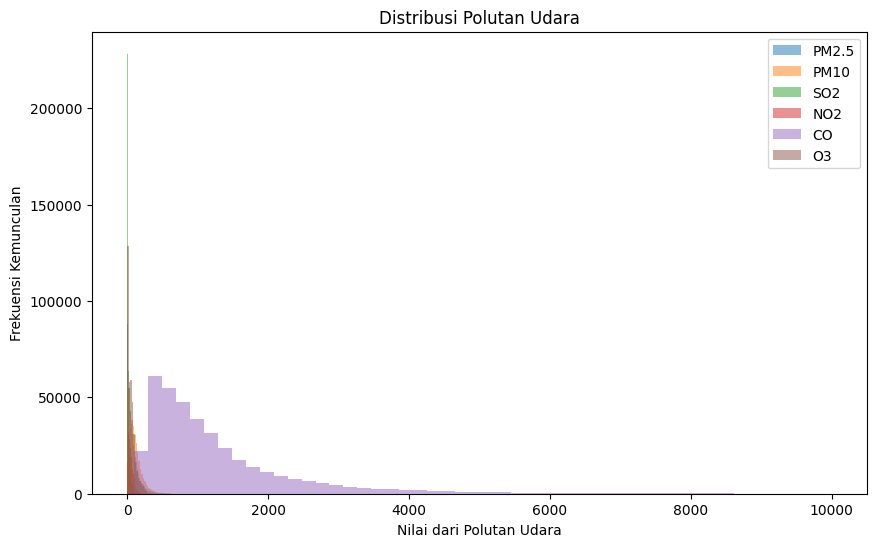

In [25]:
# Menentukan Tingkat Polutan Udara yang Paling Umum
# Buat grafik untuk menampilkan distribusi polutan udara
plt.figure(figsize=(10, 6))
plt.hist(new_df['PM2.5'], bins=50, alpha=0.5, label='PM2.5')
plt.hist(new_df['PM10'], bins=50, alpha=0.5, label='PM10')
plt.hist(new_df['SO2'], bins=50, alpha=0.5, label='SO2')
plt.hist(new_df['NO2'], bins=50, alpha=0.5, label='NO2')
plt.hist(new_df['CO'], bins=50, alpha=0.5, label='CO')
plt.hist(new_df['O3'], bins=50, alpha=0.5, label='O3')
plt.xlabel('Nilai dari Polutan Udara')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Distribusi Polutan Udara')
plt.legend()
plt.show()

### Pertanyaan 2:

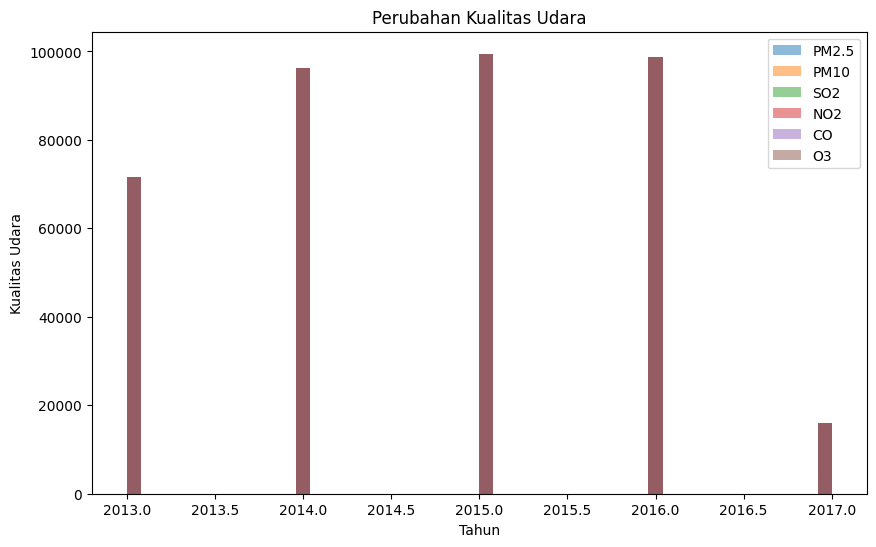

In [28]:
# Menentukan Bagaimana Kualitas Udara Berubah Selama Periode Waktu Tertentu
# Buat grafik untuk menampilkan bagaimana kualitas udara berubah selama periode waktu tertentu
plt.figure(figsize=(10, 6))
plt.hist(new_df['year'], bins=50, alpha=0.5, label='PM2.5')
plt.hist(new_df['year'], bins=50, alpha=0.5, label='PM10')
plt.hist(new_df['year'], bins=50, alpha=0.5, label='SO2')
plt.hist(new_df['year'], bins=50, alpha=0.5, label='NO2')
plt.hist(new_df['year'], bins=50, alpha=0.5, label='CO')
plt.hist(new_df['year'], bins=50, alpha=0.5, label='O3')
plt.xlabel('Tahun')
plt.ylabel('Kualitas Udara')
plt.title('Perubahan Kualitas Udara')
plt.legend()
plt.show()

## Conclusion

- Conclution pertanyaan 1: SO2 menjadi polutan paling umum karena paling sering muncul, dan CO menjadi polutan yang memiliki nilai paling tinggi diantara polutan yang lain.
- Conclution pertanyaan 2: Perubahan rata-rata kualitas udara yang buruk tertinggi ada pada tahun 2014 - 2016 dan terendah pada 2017